In [4]:
import matplotlib.pyplot as plt
from sklearn import datasets


## `annotation`

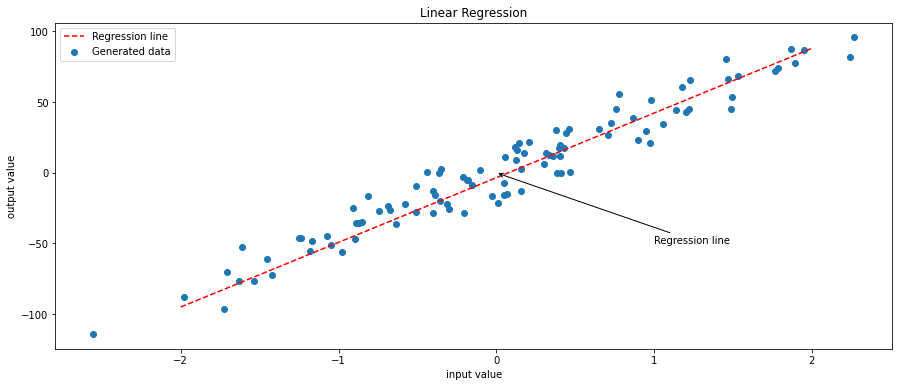

In [5]:

x, y, _ = datasets.make_regression(n_samples=100, n_features=1, noise=10, coef=True, random_state=0)

plt.plot([-2,2],[-95, 88], c='r', ls='--', label="Regression line")
plt.scatter(x,y, label="Generated data")
plt.title("Linear Regression")
plt.legend()
plt.xlabel("input value")
plt.ylabel("output value")
plt.annotate("Regression line", (0,0), (1,-50), arrowprops={"arrowstyle":"->"})

fig = plt.gcf()
fig.set_figwidth(15)
fig.set_figheight(6)

## subplots

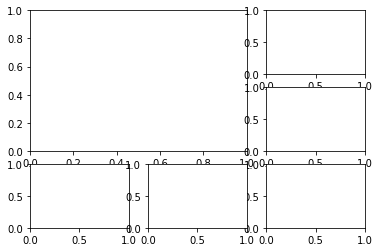

In [7]:
fig = plt.figure()
gs = fig.add_gridspec(3, 3)
ax1 = fig.add_subplot(gs[:2,:-1])
ax2 = fig.add_subplot(gs[0,-1])
ax3 = fig.add_subplot(gs[1,-1])
ax4 = fig.add_subplot(gs[2,-1])
ax5 = fig.add_subplot(gs[2,0])
ax6 = fig.add_subplot(gs[2,1])

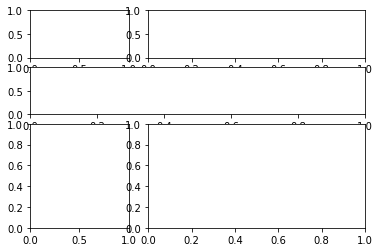

In [8]:
fig = plt.figure()
gs = fig.add_gridspec(4, 3)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1:3])
ax3 = fig.add_subplot(gs[1,:])
ax4 = fig.add_subplot(gs[2:,0])
ax5 = fig.add_subplot(gs[2:,1:])

## seabron

In [77]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Counting number of datapoints

In [11]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

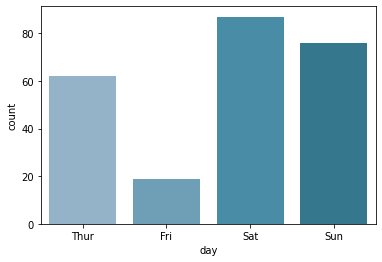

In [12]:
with sns.color_palette("PuBuGn_d"):
    sns.countplot(data = df, x='day', 
                  order=['Thur', 'Fri', 'Sat', 'Sun'])

<AxesSubplot:xlabel='day', ylabel='count'>

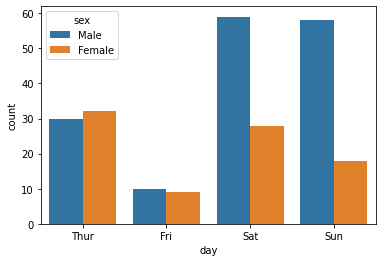

In [13]:
sns.countplot(data=df,
              x="day",
             hue="sex")

### Distribution

<AxesSubplot:xlabel='tip', ylabel='Count'>

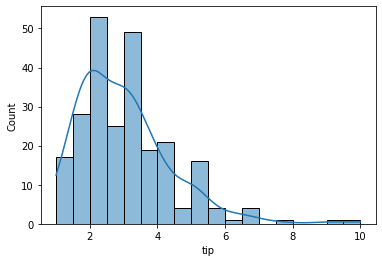

In [16]:
## overlay 'kernel density estimator'
sns.histplot(df.tip, kde=True) 

#### Multiple distribution

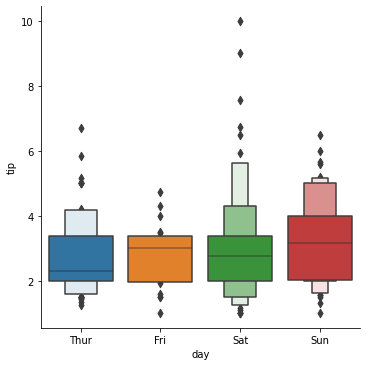

In [17]:
sns.catplot(data=df, x='day', y='tip', kind='boxen')

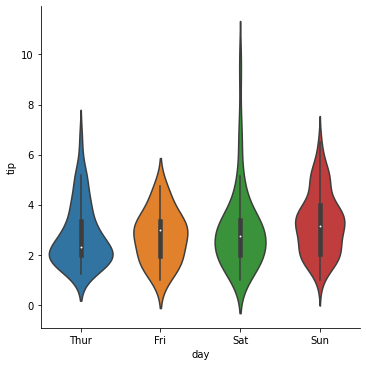

In [18]:
sns.catplot(data=df, x='day', y='tip', 
            kind='violin')

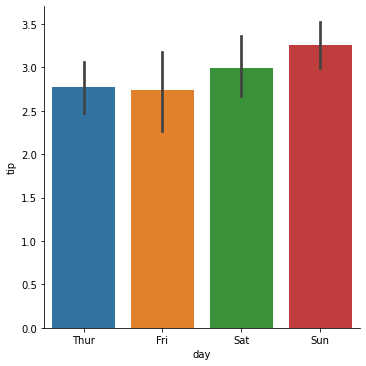

In [19]:
sns.catplot(data=df, x='day', y='tip', 
            kind='bar')

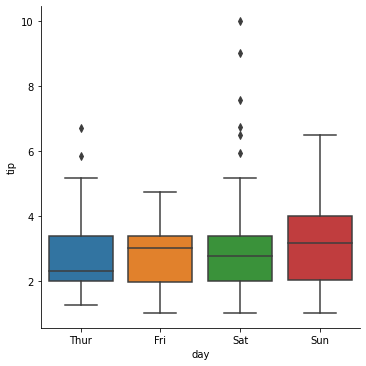

In [20]:
sns.catplot(data=df, x='day', y='tip', 
            kind='box')

In [79]:
df["tip_share"]=round(df.tip / df.total_bill * 100, 2)

[Text(0, 0.5, 'Tip (%)')]

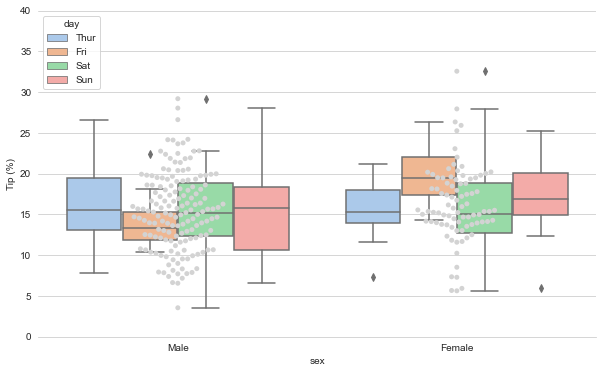

In [82]:
# PLOT HERE
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,6))
sns.swarmplot(x="sex",
              y="tip_share",
              data=df,
              color='lightgray',
              size=5, 
              ax=ax)

sns.boxplot(x='sex', 
            y = 'tip_share', 
            hue = 'day', 
            hue_order=["Thur", "Fri", "Sat", "Sun"], 
            data = df, 
            palette="pastel", 
            ax=ax)

sns.despine(top=True,left=True,right=True)
ax.set(ylim=(0, 40))
ax.set(ylabel="Tip (%)")

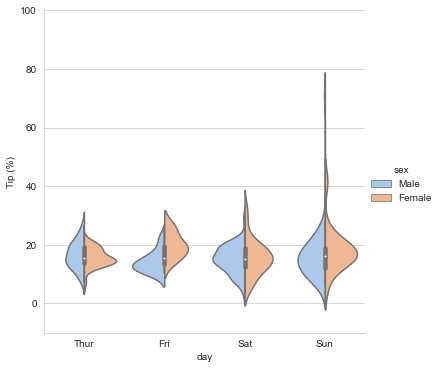

In [84]:
# YOUR PLOT HERE
sns.set_style('whitegrid')
g = sns.catplot(x='day',
                y ='tip_share', 
                hue ='sex',
                order=["Thur", "Fri", "Sat", "Sun"],
                data = df, 
                kind= "violin", 
                palette="pastel", 
                split=True)
g.set_ylabels("Tip (%)")
g.set(ylim=(-10, 100))

### FacetGrid 

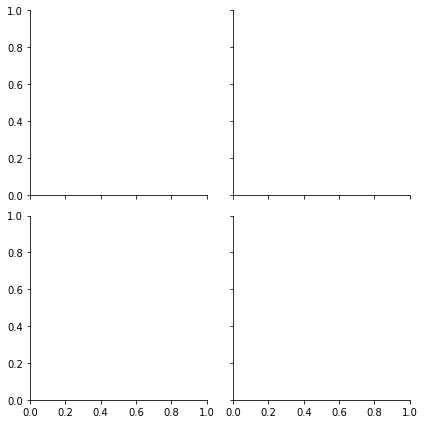

In [22]:
sns.FacetGrid(df, col="time", row="sex")

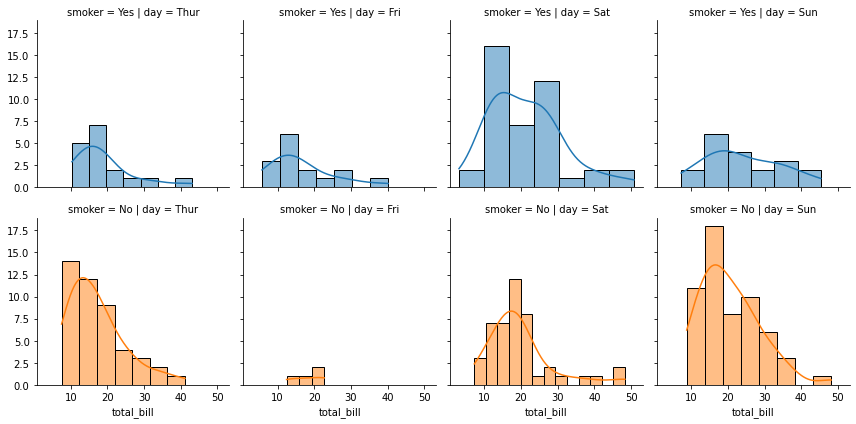

In [26]:
g = sns.FacetGrid(df, col="day", row="smoker", hue='smoker')
g.map(sns.histplot, "total_bill", kde=True)

## Correlations

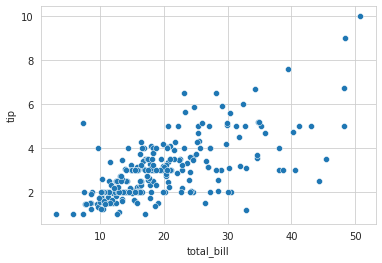

In [27]:
with sns.axes_style(style="whitegrid"):
    sns.scatterplot(x="total_bill", y="tip", data=df)

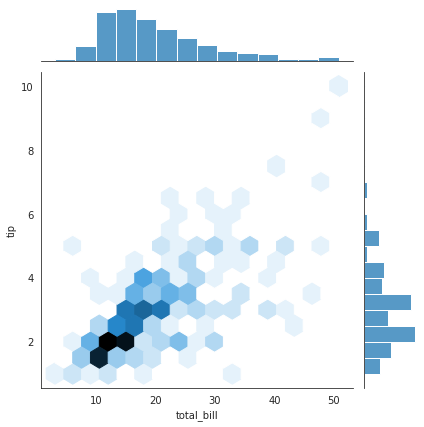

In [28]:
with sns.axes_style("white"):
    sns.jointplot(x="total_bill", y="tip", kind="hex", data=df)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

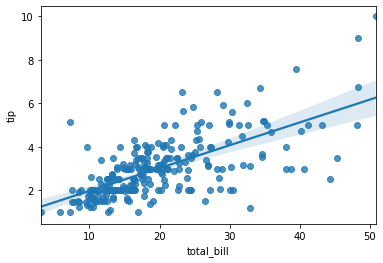

In [29]:
sns.regplot(x="total_bill", y="tip", data=df)

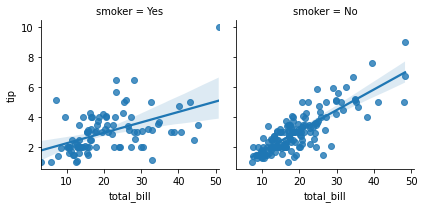

In [30]:
g = sns.FacetGrid(data=df, col="smoker")
g.map(sns.regplot, "total_bill", "tip")

## Pairplot

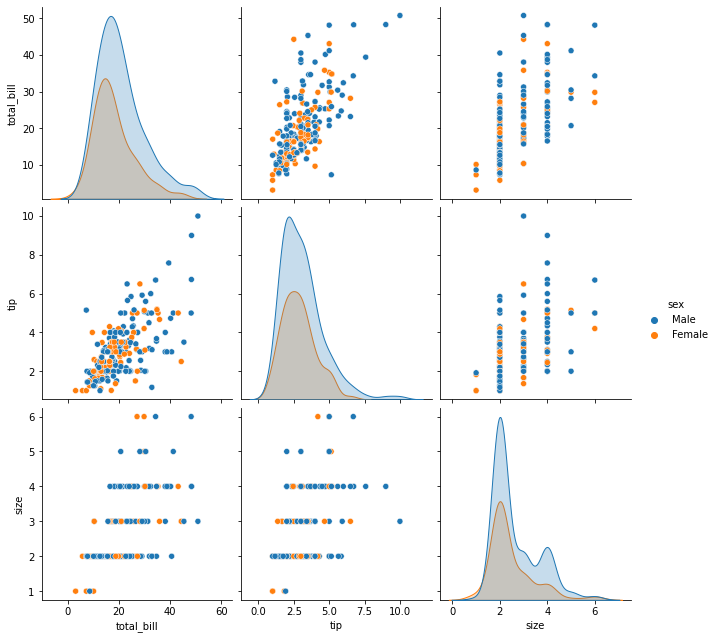

In [40]:
sns.pairplot(df, height=3, hue="sex")

## Bubble chart

In [44]:
import plotly.express as px
df = px.data.gapminder()

fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp",
                 size="pop", color="continent",
                 hover_name="country", log_x=True, size_max=60)
fig.show()

In [45]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import math

# Load data, define hover text and bubble size
data = px.data.gapminder()
df_2007 = data[data['year']==2007]
df_2007 = df_2007.sort_values(['continent', 'country'])

hover_text = []
bubble_size = []

for index, row in df_2007.iterrows():
    hover_text.append(('Country: {country}<br>'+
                      'Life Expectancy: {lifeExp}<br>'+
                      'GDP per capita: {gdp}<br>'+
                      'Population: {pop}<br>'+
                      'Year: {year}').format(country=row['country'],
                                            lifeExp=row['lifeExp'],
                                            gdp=row['gdpPercap'],
                                            pop=row['pop'],
                                            year=row['year']))
    bubble_size.append(math.sqrt(row['pop']))

df_2007['text'] = hover_text
df_2007['size'] = bubble_size
sizeref = 2.*max(df_2007['size'])/(100**2)

# Dictionary with dataframes for each continent
continent_names = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
continent_data = {continent:df_2007.query("continent == '%s'" %continent)
                              for continent in continent_names}

# Create figure
fig = go.Figure()

for continent_name, continent in continent_data.items():
    fig.add_trace(go.Scatter(
        x=continent['gdpPercap'], y=continent['lifeExp'],
        name=continent_name, text=continent['text'],
        marker_size=continent['size'],
        ))

# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))

fig.update_layout(
    title='Life Expectancy v. Per Capita GDP, 2007',
    xaxis=dict(
        title='GDP per capita (2000 dollars)',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Life Expectancy (years)',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.show()

## Map

In [53]:
file="data/FastFoodRestaurants.csv"
restaurant_df = pd.read_csv(file, decimal=",")
restaurant_df.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.9213,-74.89021,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,Wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."


In [54]:
restaurant_df['latitude'] = restaurant_df['latitude'].astype(float)
restaurant_df['longitude'] = restaurant_df['longitude'].astype(float)

In [55]:
grouped_by_city = restaurant_df.groupby('city')
grouped_by_city

In [56]:
by_city_df = grouped_by_city.agg({
    'city' : 'count',
    'latitude' : 'mean',
    'longitude' : 'mean'
}).rename(columns={'city':'Nb of fastfoods'})
by_city_df.head(5)

,Nb of fastfoods,latitude,longitude
city,,,
Abbeville,2,29.980450,-92.118881
Aberdeen,18,45.061965,-104.615967
Abilene,3,34.603870,-98.901467
Abingdon,1,36.701430,-81.975120
Acton,1,42.468486,-71.456183


In [57]:
fig = px.scatter_geo(by_city_df, 
                     lat="latitude", 
                     lon="longitude", 
                     size="Nb of fastfoods", 
                     title="Fastfood Restaurants Accross the U.S.",
                     scope="usa"
                    )
fig.show()

In [59]:
file = "data/Datafiniti_Fast_Food_Restaurants.csv"
restaurant_df = pd.read_csv(file, decimal=",")
restaurant_df.head(5)

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...


In [61]:
restaurant_df['dateAdded'] = restaurant_df['dateAdded'].str.split('-').str[0]

In [62]:
restaurant_df['dateAdded'] = pd.to_datetime(restaurant_df['dateAdded'], format='%Y')
restaurant_df['dateAdded'] = restaurant_df['dateAdded'].dt.year
restaurant_df['dateAdded']

0       2015
1       2015
2       2016
3       2017
4       2018
        ... 
9995    2017
9996    2017
9997    2015
9998    2016
9999    2016
Name: dateAdded, Length: 10000, dtype: int64

In [65]:
restaurant_df

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,AVwcmSyZIN2L1WUfmxyw,2015,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,AV12gJwna4HuVbed9Ayg,2017,2018-04-07T13:19:06Z,3460 Robinhood Rd,Fast Food Restaurants,Winston-Salem,US,us/nc/winston-salem/3460robinhoodrd/-66712705,36.117563,-80.316553,Pizza Hut,27106,NC,https://www.allmenus.com/nc/winston-salem/7341...,http://www.pizzahut.com
9996,AV12gJxKIxWefVJwhpzS,2017,2018-04-07T13:19:05Z,3069 Kernersville Rd,Fast Food Restaurants,Winston-Salem,US,us/nc/winston-salem/3069kernersvillerd/-66712705,36.077718,-80.176748,Pizza Hut,27107,NC,https://www.allmenus.com/nc/winston-salem/7340...,http://www.pizzahut.com
9997,AVwdJMdSByjofQCxl8Vr,2015,2018-04-07T13:19:05Z,838 S Main St,Fast Food Restaurants,Kernersville,US,us/nc/kernersville/838smainst/-66712705,36.111015,-80.089165,Pizza Hut,27284,NC,https://www.allmenus.com/nc/kernersville/73400...,http://www.pizzahut.com
9998,AVwdl2cykufWRAb57ZPs,2016,2018-04-07T13:19:05Z,1702 Glendale Dr SW,Fast Food Restaurants,Wilson,US,us/nc/wilson/1702glendaledrsw/-66712705,35.719981,-77.945795,Pizza Hut,27893,NC,https://www.allmenus.com/nc/wilson/73403-pizza...,http://www.pizzahut.com


In [67]:
fig = px.scatter_geo(restaurant_df.sort_values(by=['dateAdded']), 
                     lat="latitude", 
                     lon="longitude",
                     hover_name="name",
                     animation_frame="dateAdded",
                     title="Evolution Of Fastfood Restaurants Accross the U.S.",
                     scope="usa",
                     opacity=0.3)
fig.show()

In [90]:
import folium

In [91]:
coordinates = [48.8649224, 2.3800903] # 16 Villa Gaudelet, Paris

m = folium.Map(location=coordinates, zoom_start=8)
folium.Marker(coordinates, tooltip='Le Wagon Paris').add_to(m)
folium.Circle(coordinates, radius=100 * 1000).add_to(m)
m

In [92]:
import requests

def geocode(address):
    params = { "q": address, 'format': 'json' }
    places = requests.get(f"https://nominatim.openstreetmap.org/search", params=params).json()
    return [places[0]['lat'], places[0]['lon']]
    
def draw_100km_map(address):
    coordinates = geocode(address)
    m = folium.Map(location=coordinates, zoom_start=8)
    folium.Marker(coordinates, tooltip='Le Wagon Paris').add_to(m)
    folium.Circle(coordinates, radius=100 * 1000).add_to(m)
    return m

In [94]:
address = input()
draw_100km_map(address)

Amsterdam 1097 JR, the Netherlands


## Bar Plot

In [68]:
file="data/bar_data.csv"
df=pd.read_csv(file)
df.head()

,year,sex,name,n,prop
0,1880,F,Helen,636,0.006516
1,1880,F,Amanda,241,0.002469
2,1880,F,Betty,117,0.001199
3,1880,F,Dorothy,112,0.001147
4,1880,F,Linda,27,0.000277


<AxesSubplot:xlabel='name'>

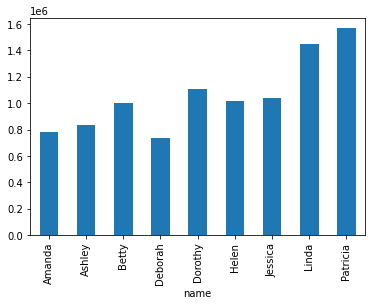

In [69]:
df.groupby(['name'])['n'].sum().plot(kind="bar")

In [70]:
# 1920, 1960, 2000
y1920 = df['year'] == 1920
y1960 = df['year'] == 1960
y2000 = df['year'] == 2000
y_selection = (y1920 | y1960 | y2000)

name1 = df['name'] == 'Ashley'
name2 = df['name'] == 'Betty'
name3 = df['name'] == 'Helen'
name4 = df['name'] == 'Patricia'
name_selection = (name1 | name2 | name3 | name4)

selection = (y_selection & name_selection)
df_extract = df[selection]
df_extract = df_extract.sort_values('name', ascending=True)

In [73]:
df_extract

,year,sex,name,n,prop
665,1960,F,Ashley,57,0.000027
1017,2000,F,Ashley,17997,0.009023
319,1920,F,Betty,14017,0.011267
660,1960,F,Betty,6503,0.003127
1025,2000,F,Betty,174,0.000087
318,1920,F,Helen,35098,0.028213
662,1960,F,Helen,4069,0.001956
1021,2000,F,Helen,890,0.000446
320,1920,F,Patricia,2502,0.002011
658,1960,F,Patricia,32107,0.015437


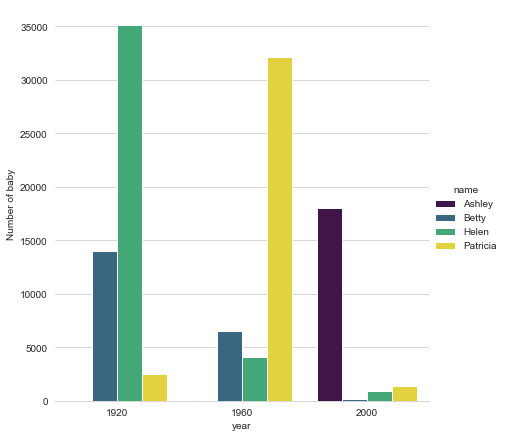

In [74]:
colors = ['#440c53','#2f688e','#34b779','#fde825']
sns.set_style('whitegrid')
g = sns.catplot(x="year", y="n", hue="name", data=df_extract,
                height=6, kind="bar", 
                palette=sns.color_palette(colors))
g.despine(left=True)
g.set_ylabels("Number of baby")

<AxesSubplot:xlabel='year'>

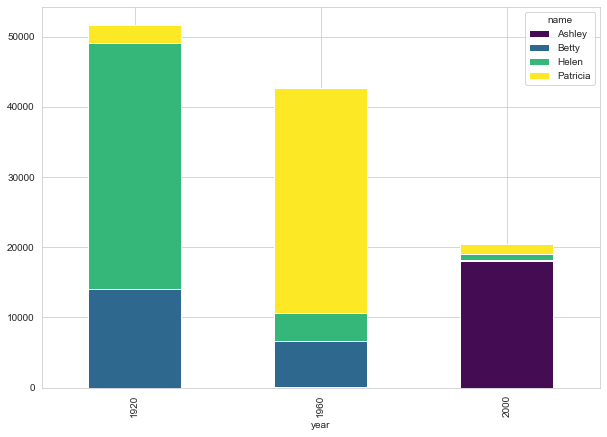

In [75]:
df_pivot = df_extract[['year','name','n']]
df_pivot = df_pivot.pivot(index='year', columns='name', values='n')
df_pivot.loc[:,['Ashley','Betty', 'Helen', 'Patricia']].plot.bar(stacked=True, color=colors, figsize=(10,7))

In [76]:
df_pivot

name,Ashley,Betty,Helen,Patricia
year,,,,
1920,NaN,14017.0,35098.0,2502.0
1960,57.0,6503.0,4069.0,32107.0
2000,17997.0,174.0,890.0,1392.0


## Ridgeplot

/Users/moyang/.pyenv/versions/3.8.5/envs/projectweb/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations

/Users/moyang/.pyenv/versions/3.8.5/envs/projectweb/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations



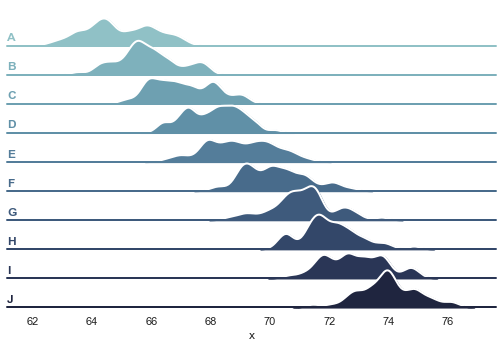

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)